Name: Samir Khan
Class: CS 4412/01
Class Assignment 1

## Imports ##

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
import seaborn as sns

Getting Data

In [0]:
# load dataset
df = pd.read_csv("/content/ecoli.csv", delim_whitespace=True,header=None)
# names to Columns
df.columns = ['SeqN', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm2', 'alm1', 'pclass']
                      
df = df.drop('SeqN', axis=1) # don't need this, not feature

# Encode Data
df.pclass.replace(('cp', 'im', 'pp', 'imU', 'om', 'omL', 'imL', 'imS'),(0,1,2,3,4,5,6,7), inplace=True)

# Set X and y Values
data = df.values
X = data[:,0:7] # seven features
y = data[:,7] # pclass 

Print X & Y Values

In [3]:
print("Features:\n", X)

Features:
 [[0.49 0.29 0.48 ... 0.56 0.24 0.35]
 [0.07 0.4  0.48 ... 0.54 0.35 0.44]
 [0.56 0.4  0.48 ... 0.49 0.37 0.46]
 ...
 [0.61 0.6  0.48 ... 0.44 0.39 0.38]
 [0.59 0.61 0.48 ... 0.42 0.42 0.37]
 [0.74 0.74 0.48 ... 0.31 0.53 0.52]]


In [4]:
print("Output Classes:\n", y)

Output Classes:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 7. 7. 6. 6. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 

Data Training & Testing

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## Neural Network

In [0]:
nn = mlp(hidden_layer_sizes=(300),activation='relu',max_iter=3000)
nn.fit(xTrain, yTrain)
pred = nn.predict(xTest)

In [7]:
nnAccuracy = accuracy_score(pred, yTest)
print('accuracy:',nnAccuracy)

accuracy: 0.8823529411764706


[[35  0  0  0  0  0  0  0]
 [ 1  7  0  1  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


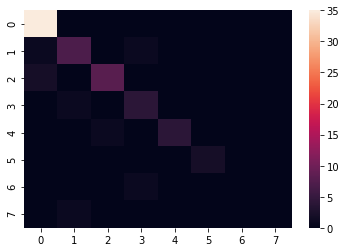

In [8]:
print(confusion_matrix(yTest, pred))
sns.heatmap(confusion_matrix(yTest, pred))

In [9]:
nn_precision = precision_score(yTest,pred,average='micro')
nn_recall = recall_score(yTest,pred,average='micro')
print('Precision:',nn_precision)
print('Recall:',nn_recall)

Precision: 0.8823529411764706
Recall: 0.8823529411764706


<BarContainer object of 3 artists>

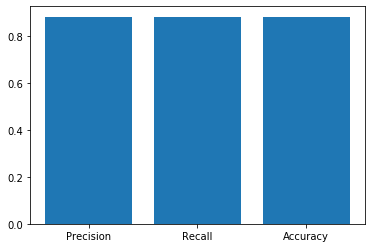

In [10]:
plt.bar(['Precision','Recall','Accuracy'],[nn_precision, nn_recall, nnAccuracy])

## Decision Tree ##

In [0]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

In [12]:
predicted = dt.predict(xTest)
dt_acc = accuracy_score(yTest, predicted)
print('accuracy:',dt_acc)

accuracy: 0.8235294117647058


[[34  0  1  0  0  0  0  0]
 [ 1  8  0  0  0  0  0  0]
 [ 2  1  6  0  0  0  0  1]
 [ 0  2  0  3  0  0  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 1  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]]


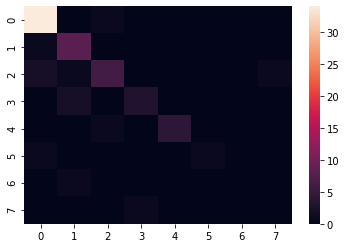

In [13]:
print(confusion_matrix(yTest, predicted))
sns.heatmap(confusion_matrix(yTest, predicted))

In [14]:
dt_precision = precision_score(yTest,predicted,average='micro')
dt_recall = recall_score(yTest,predicted,average='micro')
print('Precision:',dt_precision)
print('Recall:',dt_recall)

Precision: 0.8235294117647058
Recall: 0.8235294117647058


<BarContainer object of 3 artists>

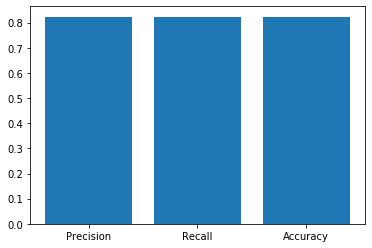

In [15]:
plt.bar(['Precision','Recall','Accuracy'],[dt_precision, dt_recall, dt_acc])

## Naive Bayes ##

In [16]:
gb = GaussianNB()
gb.fit(xTrain, yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
predicted = gb.predict(xTest)
gb_acc = accuracy_score(yTest, predicted)
print('accuracy:',gb_acc)

accuracy: 0.7941176470588235


[[35  0  0  0  0  0  0  0]
 [ 4  5  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  0  2  3  0  0  0  0]
 [ 0  0  4  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


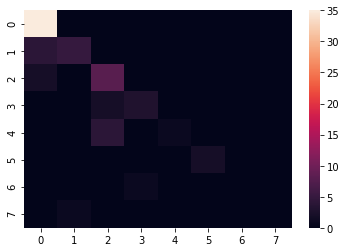

In [18]:
print(confusion_matrix(yTest, predicted))
sns.heatmap(confusion_matrix(yTest, predicted))

In [19]:
gb_precision = precision_score(yTest,predicted,average='micro')
gb_recall = recall_score(yTest,predicted,average='micro')
print('Precision:',gb_precision)
print('Recall:',gb_recall)

Precision: 0.7941176470588235
Recall: 0.7941176470588235


<BarContainer object of 3 artists>

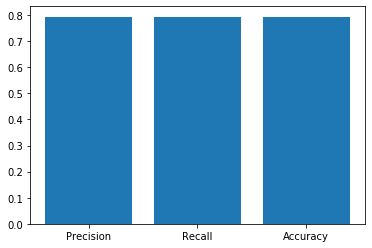

In [20]:
plt.bar(['Precision','Recall','Accuracy'],[gb_precision, gb_recall, gb_acc])

## Support Vector Machines ##

In [21]:
sv = svm.SVC(gamma='auto')
sv.fit(xTrain, yTrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
predicted = sv.predict(xTest)
acc_svm = accuracy_score(yTest, predicted)
print('accuracy:',acc_svm)

accuracy: 0.7205882352941176


[[35  0  0  0  0  0  0  0]
 [ 3  6  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


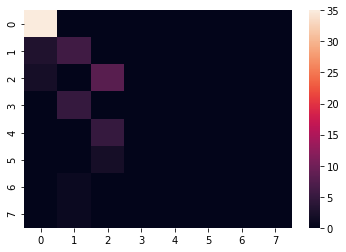

In [23]:
print(confusion_matrix(yTest, predicted))
sns.heatmap(confusion_matrix(yTest, predicted))

In [24]:
precision_svm = precision_score(yTest,predicted,average='micro')
recall_svm = recall_score(yTest,predicted,average='micro')
print('Precision:',precision_svm)
print('Recall:',recall_svm)

Precision: 0.7205882352941176
Recall: 0.7205882352941176


<BarContainer object of 3 artists>

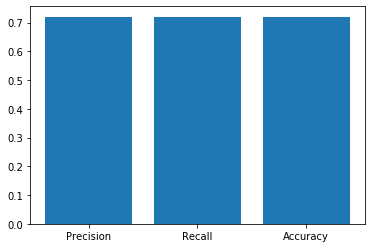

In [25]:
plt.bar(['Precision','Recall','Accuracy'],[precision_svm, recall_svm, acc_svm])

## Comparisons ##

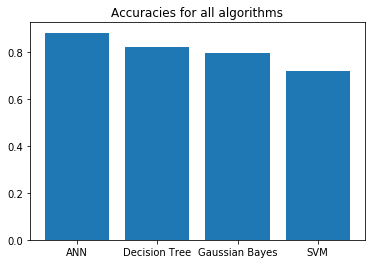

In [26]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nnAccuracy, dt_acc, gb_acc, acc_svm])
plt.title('Accuracies for all algorithms')
plt.show()

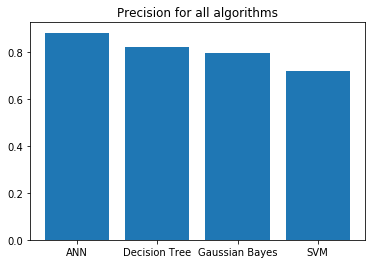

In [27]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nn_precision, dt_precision, gb_precision, precision_svm])
plt.title('Precision for all algorithms')
plt.show()

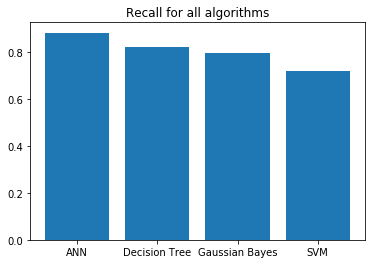

In [28]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nn_recall, dt_recall, gb_recall, recall_svm])
plt.title('Recall for all algorithms')
plt.show()